In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #import library untuk Random Forest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# membaca dataset
dataset = pd.read_csv('drive/My Drive/ML/used_cars.csv')

In [0]:
# mengambil data yang akan dipakai
df1 = dataset[['price','year','odometer','condition']].copy()

<Figure size 750x750 with 0 Axes>

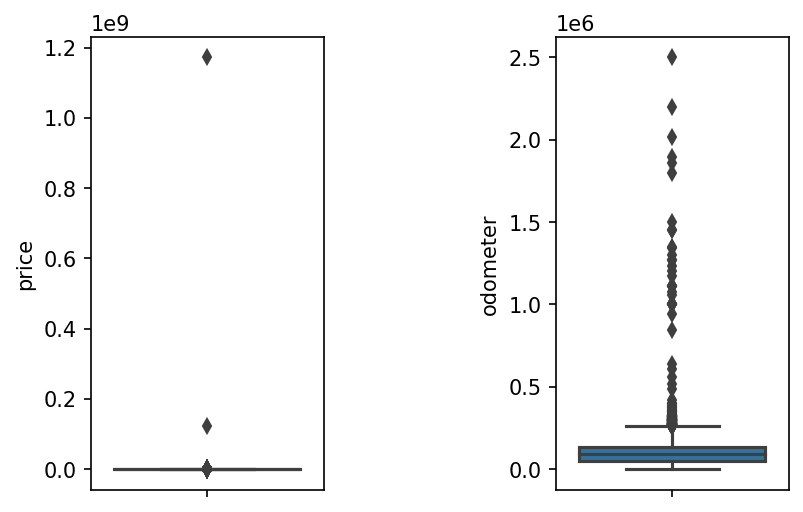

In [4]:
# melihat sebaran outlier sebelum data cleansing
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df1["price"], ax=axes[0])
sns.boxplot(y=df1["odometer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
# data cleansing
df1.dropna(inplace=True)
drop = df1.drop(df1.loc[df1['price'] == 0].index, inplace=True)
drop = df1.drop(df1.loc[df1['odometer'] > 250000].index, inplace=True)
drop = df1.drop(df1.loc[df1['price'] > 30000].index, inplace=True)

In [6]:
# melihat jumlah data yang bernilai null
df1.isna().sum()

price        0
year         0
odometer     0
condition    0
dtype: int64

<Figure size 750x750 with 0 Axes>

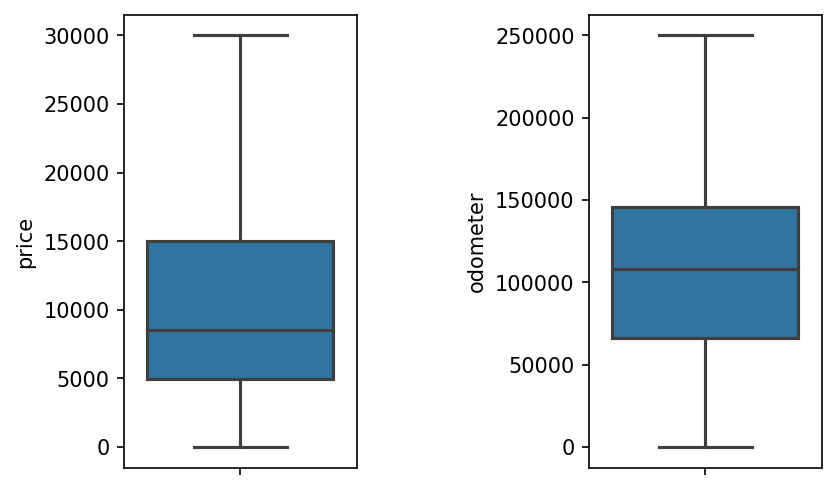

In [7]:
# melihat sebaran outlier setelah data cleansing
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df1["price"], ax=axes[0])
sns.boxplot(y=df1["odometer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
# encode string menjadi integer
df1 = df1.replace(to_replace =("New","Excellent","Like New","Good","Fair","Salvage"), 
                 value =(6,5,4,3,2,1)) 

In [0]:
# feature selection untuk training set
y = df1.iloc[:,3]
x = df1.iloc[:,:3]

In [10]:
# melihat tingkat akurasi menggunakan algoritma Random Forest
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(x, y)
RF.predict(x.iloc[int(df1.shape[0]*0.7):,:])
print("Tingkat akurasi (Random Forest) : ",round(RF.score(x,y), 4))

Tingkat akurasi (Random Forest) :  0.5655
